In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def adjust_timestamps(data, day_offset):
    data['timestamp'] += day_offset * 1000000
    return data

round1_1 = adjust_timestamps(pd.read_csv('data/trades_round_1_day_-2_wn.csv', sep=';'), 0)
round1_2 = adjust_timestamps(pd.read_csv('data/trades_round_1_day_-1_wn.csv', sep=';'), 1)
round1_3 = adjust_timestamps(pd.read_csv('data/trades_round_1_day_0_wn.csv', sep=';'), 2)

round3_1 = adjust_timestamps(pd.read_csv('data/trades_round_3_day_0_wn.csv', sep=';'), 0)
round3_2 = adjust_timestamps(pd.read_csv('data/trades_round_3_day_1_wn.csv', sep=';'), 1)
round3_3 = adjust_timestamps(pd.read_csv('data/trades_round_3_day_2_wn.csv', sep=';'), 2)

round4_1 = adjust_timestamps(pd.read_csv('data/trades_round_4_day_1_wn.csv', sep=';'), 0)
round4_2 = adjust_timestamps(pd.read_csv('data/trades_round_4_day_2_wn.csv', sep=';'), 1)
round4_3 = adjust_timestamps(pd.read_csv('data/trades_round_4_day_3_wn.csv', sep=';'), 2)

round1_price2 = adjust_timestamps(pd.read_csv("data/prices_round_1_day_-2.csv", sep=";"), 0)
round1_price1 = adjust_timestamps(pd.read_csv("data/prices_round_1_day_-1.csv", sep=";"), 1)
round1_price0 = adjust_timestamps(pd.read_csv("data/prices_round_1_day_0.csv", sep=";"), 2)

round3_price0 = adjust_timestamps(pd.read_csv("data/prices_round_3_day_0.csv", sep=";"), 0)
round3_price1 = adjust_timestamps(pd.read_csv("data/prices_round_3_day_1.csv", sep=";"), 1)
round3_price2 = adjust_timestamps(pd.read_csv("data/prices_round_3_day_2.csv", sep=";"), 2)

round4_price1 = adjust_timestamps(pd.read_csv("data/prices_round_4_day_1.csv", sep=";"), 0)
round4_price2 = adjust_timestamps(pd.read_csv("data/prices_round_4_day_2.csv", sep=";"), 1)
round4_price3 = adjust_timestamps(pd.read_csv("data/prices_round_4_day_3.csv", sep=";"), 2)

round_1 = pd.concat([round1_1, round1_2, round1_3])
round_3 = pd.concat([round3_1, round3_2, round3_3])
round_4 = pd.concat([round4_1, round4_2, round4_3])

round_1_prices = pd.concat([round1_price2, round1_price1, round1_price0])
round_3_prices = pd.concat([round3_price0, round3_price1, round3_price2])
round_4_prices = pd.concat([round4_price1, round4_price2, round4_price3])

SEASHELLS = "SEASHELLS"
AMETHYSTS = "AMETHYSTS"
STARFRUIT = "STARFRUIT"
ORCHIDS = "ORCHIDS"
CHOCOLATE = "CHOCOLATE"
STRAWBERRIES = "STRAWBERRIES"
ROSES = "ROSES"
GIFT_BASKET = "GIFT_BASKET"
COCONUT = "COCONUT"
COCONUT_COUPON = "COCONUT_COUPON"

r1_products = [AMETHYSTS, STARFRUIT]
r3_products = [CHOCOLATE, STRAWBERRIES, ROSES, GIFT_BASKET]
r4_products = [COCONUT, COCONUT_COUPON]

In [6]:
r1_traders = round_1["buyer"].unique()
r3_traders = round_3["buyer"].unique()
r4_traders = round_4["buyer"].unique()

In [9]:
# Trader PnLs

def calc_pnl(trader, trades):
    buys = trades.apply(lambda row: -row["price"] * row["quantity"] if row["buyer"] == trader else 0, axis=1)
    sells = trades.apply(lambda row: row["price"] * row["quantity"] if row["seller"] == trader else 0, axis=1)
    pnl = buys.sum() + sells.sum()
    return pnl

r1_pnls = {trader: {} for trader in r1_traders}
r3_pnls = {trader: {} for trader in r3_traders}
r4_pnls = {trader: {} for trader in r4_traders}


for trader in r1_traders:
    data = {product: round_1[round_1["symbol"] == product] for product in r1_products}
    for product, trades in data.items():
        r1_pnls[trader][product] = calc_pnl(trader, trades)

for trader in r3_traders:
    data = {product: round_3[round_3["symbol"] == product] for product in r3_products}
    for product, trades in data.items():
        r3_pnls[trader][product] = calc_pnl(trader, trades)

for trader in r4_traders:
    data = {product: round_4[round_4["symbol"] == product] for product in r4_products}
    for product, trades in data.items():
        r4_pnls[trader][product] = calc_pnl(trader, trades)

In [14]:
print(round_1_prices.head())

   day  timestamp    product  bid_price_1  bid_volume_1  bid_price_2  \
0   -2          0  AMETHYSTS         9996             1       9995.0   
1   -2          0  STARFRUIT         4997            26          NaN   
2   -2        100  AMETHYSTS        10000             5       9995.0   
3   -2        100  STARFRUIT         5000             5       4998.0   
4   -2        200  STARFRUIT         4997             1       4996.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0          25.0          NaN           NaN        10004             1   
1           NaN          NaN           NaN         5003            26   
2          20.0          NaN           NaN        10005            20   
3           6.0       4997.0          20.0         5004            20   
4          30.0          NaN           NaN         5003            31   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0      10005.0          25.0          NaN           NaN   

In [15]:
r1_traders

array(['Vinnie', 'Remy', 'Ruby', 'Rhianna', 'Valentina', 'Vladimir',
       'Adam', 'Amelia'], dtype=object)

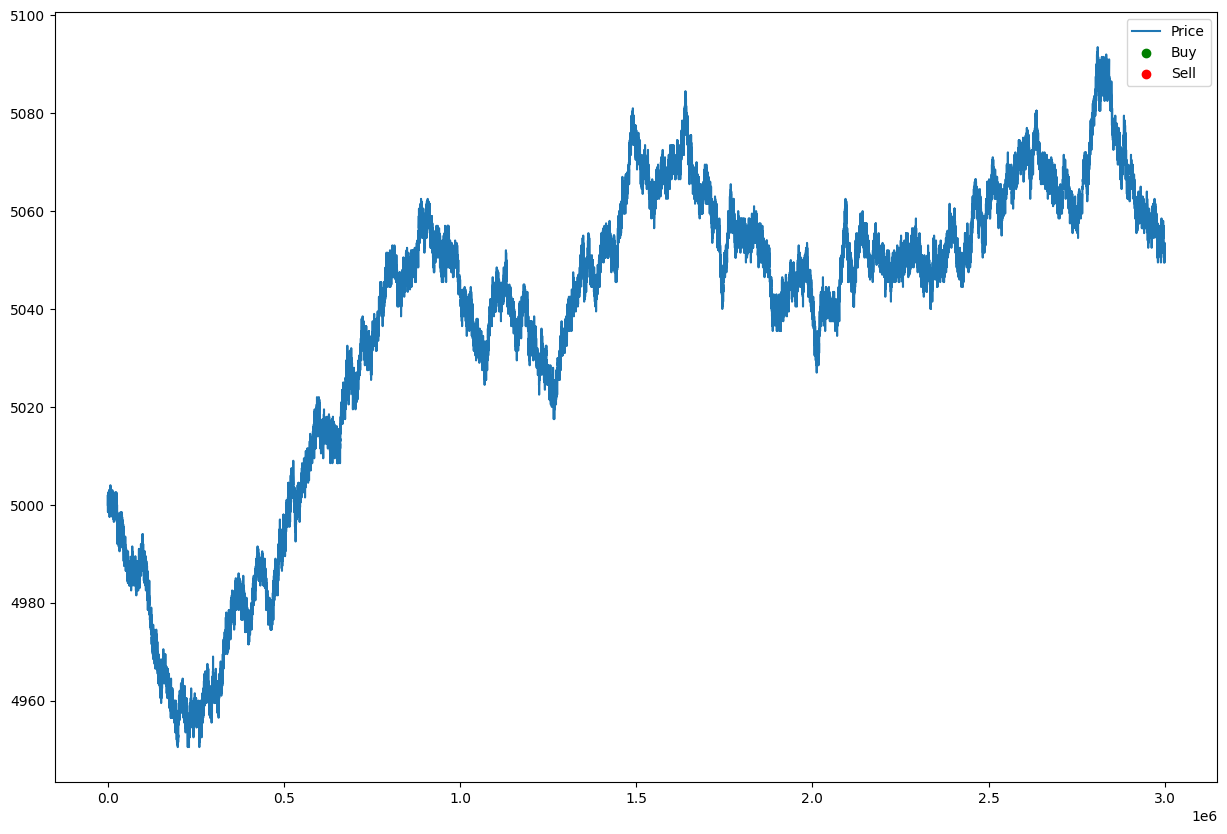

In [50]:
# Starfruit
prices = round_1_prices[round_1_prices["product"] == STARFRUIT]
trades = round_1[round_1["symbol"] == STARFRUIT]
trader = ''

buys = trades[trades["buyer"] == trader]
sells = trades[trades["seller"] == trader]
plt.figure(figsize=(15, 10))
plt.plot(prices["timestamp"], prices["mid_price"], label="Price")
plt.scatter(buys["timestamp"], buys["price"], color="green", label="Buy")
plt.scatter(sells["timestamp"], sells["price"], color="red", label="Sell")
plt.legend()
plt.show()

In [51]:
r3_traders

array(['Remy', 'Vinnie', 'Ruby', 'Rhianna', 'Vladimir'], dtype=object)

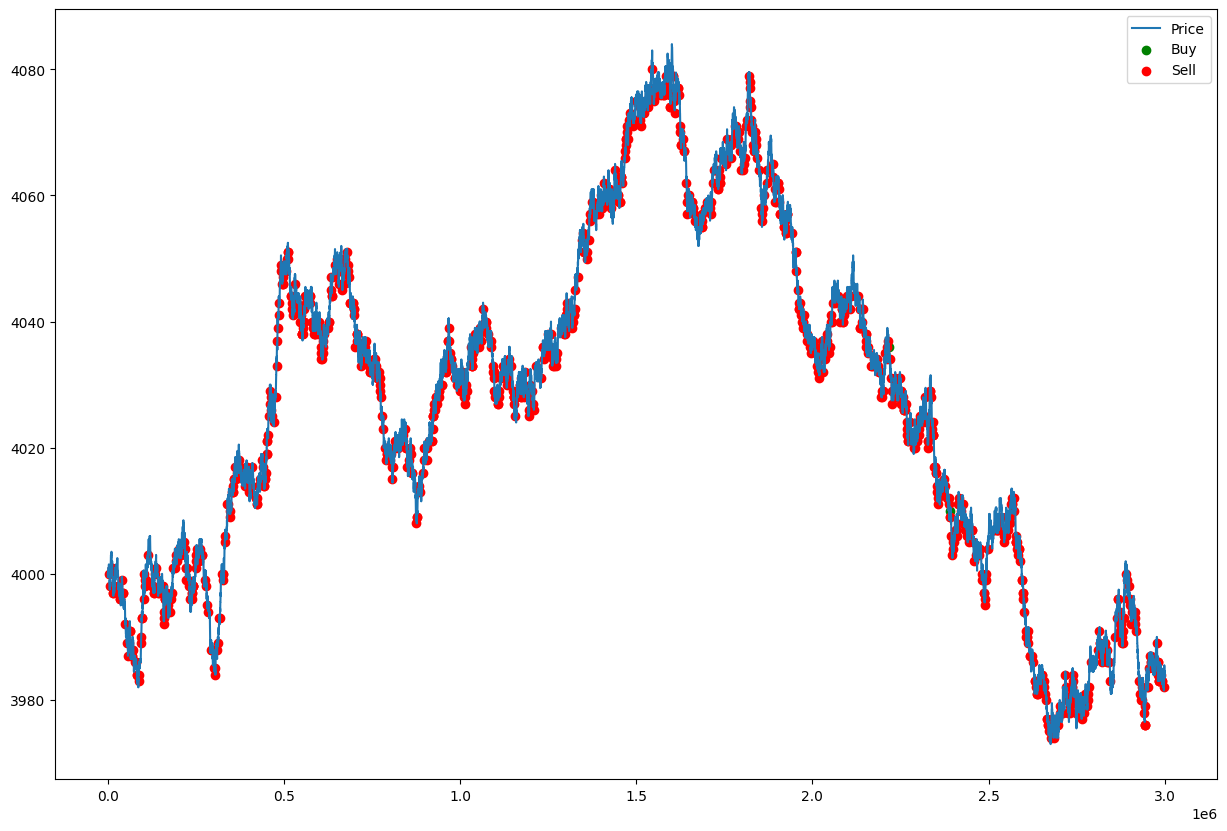

In [56]:
# Strawberries
prices = round_3_prices[round_3_prices["product"] == STRAWBERRIES]
trades = round_3[round_3["symbol"] == STRAWBERRIES]
trader = 'Vladimir'

buys = trades[trades["buyer"] == trader]
sells = trades[trades["seller"] == trader]
plt.figure(figsize=(15, 10))
plt.plot(prices["timestamp"], prices["mid_price"], label="Price")
plt.scatter(buys["timestamp"], buys["price"], color="green", label="Buy")
plt.scatter(sells["timestamp"], sells["price"], color="red", label="Sell")
plt.legend()
plt.show()

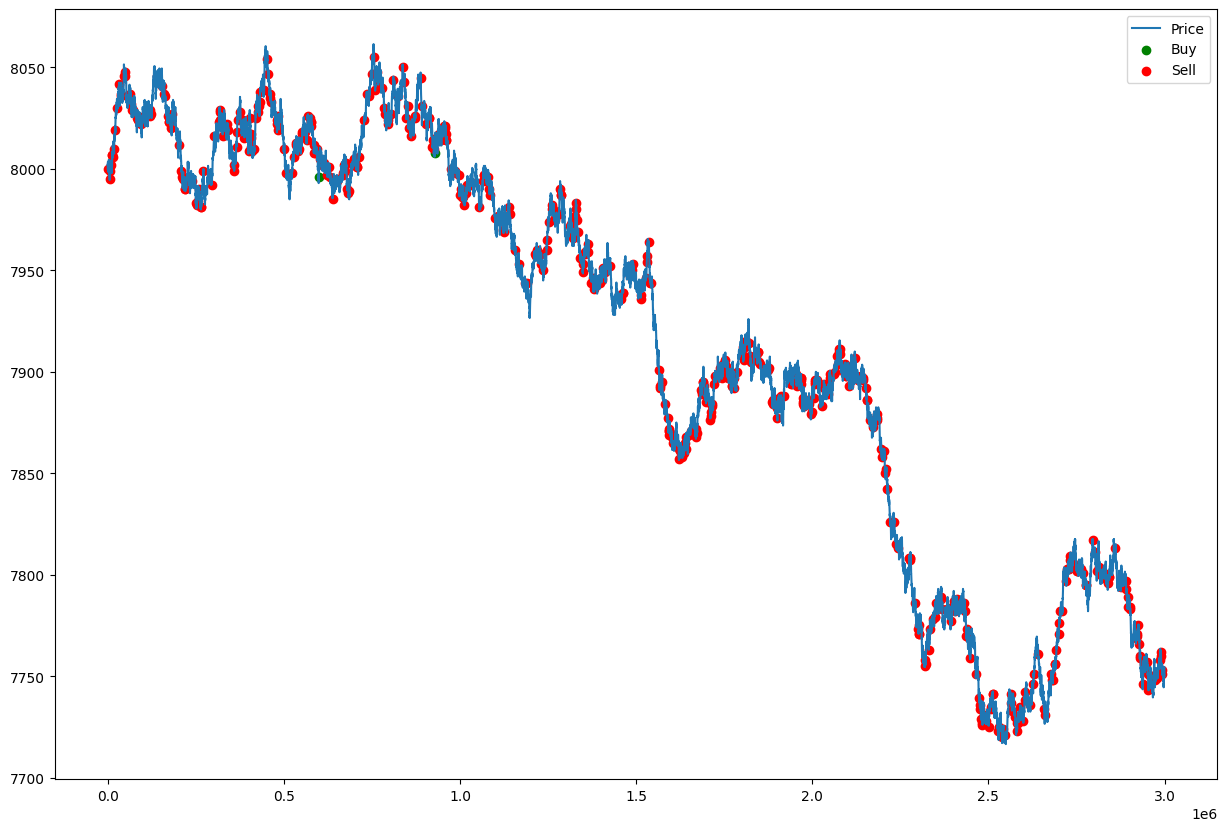

In [57]:
# Chocolate
prices = round_3_prices[round_3_prices["product"] == CHOCOLATE]
trades = round_3[round_3["symbol"] == CHOCOLATE]
trader = 'Vladimir'

buys = trades[trades["buyer"] == trader]
sells = trades[trades["seller"] == trader]
plt.figure(figsize=(15, 10))
plt.plot(prices["timestamp"], prices["mid_price"], label="Price")
plt.scatter(buys["timestamp"], buys["price"], color="green", label="Buy")
plt.scatter(sells["timestamp"], sells["price"], color="red", label="Sell")
plt.legend()
plt.show()

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Remy,Vinnie,ROSES,SEASHELLS,15001.0,3
1,0,Remy,Vinnie,CHOCOLATE,SEASHELLS,8001.0,8
2,200,Vinnie,Rhianna,ROSES,SEASHELLS,15000.0,3
3,500,Vinnie,Remy,STRAWBERRIES,SEASHELLS,3999.0,10
4,1000,Ruby,Vinnie,GIFT_BASKET,SEASHELLS,71360.0,2
